In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from dtreeviz.trees import dtreeviz 
import seaborn as sns

# If you're working in Jupyter Notebook, include the following so that plots will display:
%matplotlib inline

In [21]:
df = pd.read_csv('longitudinal_bl3y_final.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [22]:
df.head()

,participant_id,redcap_event_name,age,gender,height_m,weight_kg_baseline,weight_kg_3yr,bmi_baseline,bmi_3yr,kl_score,kl_score_contra,shoamri_total,shoamri_bme_score,shoamri_sc_score,shoamri_lab_score,shoamri_mis_score,shoamri_car_score,mhi5_score_baseline,mhi5_score_3yr,hoos_symptoms_score_baseline,hoos_adl_score_baseline,hoos_sports_score_baseline,hoos_qol_score_baseline,hoos_symptoms_score_3yr,hoos_adl_score_3yr,hoos_sports_score_3yr,hoos_qol_score_3yr,hoos_pain_score_baseline,hoos_pain_score_3yr,char_rise_baseline,m_walk_test_baseline,stair_climbing_baseline,side_plank_baseline,st_hip_side_baseline,char_rise_3yr,m_walk_test_3yr,stair_climbing_3yr,side_plank_3yr,st_hip_side_3yr,t1rho_mean_fem_whole_cartilage_baseline,t2_mean_fem_whole_cartilage_baseline,t1rho_mean_ace_whole_cartilage_baseline,t2_mean_ace_whole_cartilage_baseline,t1rho_mean_fem_whole_cartilage_3yr,t2_mean_fem_whole_cartilage_3yr,t1rho_mean_ace_whole_cartilage_3yr,t2_mean_ace_whole_cartilage_3yr,st_hip_flex_norm_baseline,st_hip_ext_norm_baseline,st_hip_abd_norm_baseline,st_hip_add_norm_baseline,st_hip_flex_norm_3yr,st_hip_ext_norm_3yr,st_hip_abd_norm_3yr,st_hip_add_norm_3yr,st_hip_flex_norm_contra_baseline,st_hip_ext_norm_contra_baseline,st_hip_abd_norm_contra_baseline,st_hip_add_norm_contra_baseline,ipaq_vigorous_met,ipaq_moderate_met,ipaq_ss_wdhrs_c,ipaq_walking_met,ipaq_categorical_score
0,P001L,baseline_arm_1,65,1,1.80,97.3,97.40,30.03,30.40,2,3,15,1,1,5,1,7,80,56,100,100.0,100.0,100.00,75,64.71,56.25,75.0,100.0,77.5,12,20.89,10.77,14.27,1,16,20.71,10.45,11.54,1,39.493545,36.250000,45.899765,31.185062,38.498367,40.279898,45.451602,42.702547,0.26,0.41,0.24,0.51,0.27,0.60,0.16,0.47,0.18,0.47,0.14,0.47,0,0,0,148.5,1
1,P001R,baseline_arm_1,65,1,1.80,97.3,97.40,30.03,30.40,3,2,16,0,1,12,0,3,80,56,100,100.0,100.0,100.00,75,66.18,50.00,75.0,100.0,80.0,12,20.89,10.77,8.99,2,16,20.71,10.45,8.63,2,37.203218,31.179208,40.687780,35.657792,38.437376,33.114392,44.508866,37.866123,0.18,0.47,0.14,0.47,0.15,0.51,0.08,0.39,0.26,0.41,0.24,0.51,0,0,0,148.5,1
2,P002L,baseline_arm_1,60,2,1.75,62.6,62.03,20.44,20.97,1,1,10,0,0,8,0,2,92,84,100,100.0,100.0,100.00,100,100.00,100.00,100.0,100.0,100.0,19,14.51,9.29,72.00,1,25,15.72,8.43,74.81,1,36.894112,36.274728,39.063521,36.883323,36.737011,39.808437,37.536424,36.280691,0.36,0.88,0.24,0.43,0.42,0.94,0.36,0.66,0.34,0.76,0.27,0.35,2880,600,0,594.0,2
3,P002R,baseline_arm_1,60,2,1.75,62.6,62.03,20.44,20.97,1,1,13,0,0,11,1,1,92,84,100,100.0,100.0,100.00,100,100.00,100.00,100.0,100.0,100.0,19,14.51,9.29,88.00,2,25,15.72,8.43,72.37,2,34.964481,26.479733,33.947857,28.195027,30.908057,27.011128,34.446011,30.539640,0.34,0.76,0.27,0.35,0.44,0.90,0.37,0.59,0.36,0.88,0.24,0.43,2880,600,0,594.0,2
4,P006L,baseline_arm_1,56,1,1.65,59.1,63.70,21.71,23.40,3,3,5,0,0,4,0,1,72,92,100,100.0,100.0,93.75,100,100.00,93.75,75.0,95.0,97.5,27,15.87,8.31,151.00,1,30,16.71,8.29,128.93,1,33.630381,32.819486,33.240301,30.177376,36.679127,38.343637,38.148536,38.226135,0.34,0.60,0.13,0.27,0.49,0.99,0.28,0.57,0.44,0.71,0.17,0.24,1080,720,1,1732.5,2


In [23]:
list(df.columns)

['participant_id',
 'redcap_event_name',
 'age',
 'gender',
 'height_m',
 'weight_kg_baseline',
 'weight_kg_3yr',
 'bmi_baseline',
 'bmi_3yr',
 'kl_score',
 'kl_score_contra',
 'shoamri_total',
 'shoamri_bme_score',
 'shoamri_sc_score',
 'shoamri_lab_score',
 'shoamri_mis_score',
 'shoamri_car_score',
 'mhi5_score_baseline',
 'mhi5_score_3yr',
 'hoos_symptoms_score_baseline',
 'hoos_adl_score_baseline',
 'hoos_sports_score_baseline',
 'hoos_qol_score_baseline',
 'hoos_symptoms_score_3yr',
 'hoos_adl_score_3yr',
 'hoos_sports_score_3yr',
 'hoos_qol_score_3yr',
 'hoos_pain_score_baseline',
 'hoos_pain_score_3yr',
 'char_rise_baseline',
 'm_walk_test_baseline',
 'stair_climbing_baseline',
 'side_plank_baseline',
 'st_hip_side_baseline',
 'char_rise_3yr',
 'm_walk_test_3yr',
 'stair_climbing_3yr',
 'side_plank_3yr',
 'st_hip_side_3yr',
 't1rho_mean_fem_whole_cartilage_baseline',
 't2_mean_fem_whole_cartilage_baseline',
 't1rho_mean_ace_whole_cartilage_baseline',
 't2_mean_ace_whole_cartila

In [24]:
df.isna().sum()

participant_id                             0
redcap_event_name                          0
age                                        0
gender                                     0
height_m                                   0
weight_kg_baseline                         0
weight_kg_3yr                              0
bmi_baseline                               0
bmi_3yr                                    0
kl_score                                   0
kl_score_contra                            0
shoamri_total                              0
shoamri_bme_score                          0
shoamri_sc_score                           0
shoamri_lab_score                          0
shoamri_mis_score                          0
shoamri_car_score                          0
mhi5_score_baseline                        0
mhi5_score_3yr                             0
hoos_symptoms_score_baseline               0
hoos_adl_score_baseline                    0
hoos_sports_score_baseline                 0
hoos_qol_s

In [25]:
#df.dropna(inplace=True)
#to get rid of some columns w/ NA df = df.dropna(subset=['colA', 'colC']) 
df.describe()

,age,gender,height_m,weight_kg_baseline,weight_kg_3yr,bmi_baseline,bmi_3yr,kl_score,kl_score_contra,shoamri_total,shoamri_bme_score,shoamri_sc_score,shoamri_lab_score,shoamri_mis_score,shoamri_car_score,mhi5_score_baseline,mhi5_score_3yr,hoos_symptoms_score_baseline,hoos_adl_score_baseline,hoos_sports_score_baseline,hoos_qol_score_baseline,hoos_symptoms_score_3yr,hoos_adl_score_3yr,hoos_sports_score_3yr,hoos_qol_score_3yr,hoos_pain_score_baseline,hoos_pain_score_3yr,char_rise_baseline,m_walk_test_baseline,stair_climbing_baseline,side_plank_baseline,st_hip_side_baseline,char_rise_3yr,m_walk_test_3yr,stair_climbing_3yr,side_plank_3yr,st_hip_side_3yr,t1rho_mean_fem_whole_cartilage_baseline,t2_mean_fem_whole_cartilage_baseline,t1rho_mean_ace_whole_cartilage_baseline,t2_mean_ace_whole_cartilage_baseline,t1rho_mean_fem_whole_cartilage_3yr,t2_mean_fem_whole_cartilage_3yr,t1rho_mean_ace_whole_cartilage_3yr,t2_mean_ace_whole_cartilage_3yr,st_hip_flex_norm_baseline,st_hip_ext_norm_baseline,st_hip_abd_norm_baseline,st_hip_add_norm_baseline,st_hip_flex_norm_3yr,st_hip_ext_norm_3yr,st_hip_abd_norm_3yr,st_hip_add_norm_3yr,st_hip_flex_norm_contra_baseline,st_hip_ext_norm_contra_baseline,st_hip_abd_norm_contra_baseline,st_hip_add_norm_contra_baseline,ipaq_vigorous_met,ipaq_moderate_met,ipaq_ss_wdhrs_c,ipaq_walking_met,ipaq_categorical_score
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,46.000000,46.000000,48.000000,48.000000,48.000000,48.000000,48.00000,48.000000,48.000000,48.000000,48.000000
mean,54.354167,1.583333,1.695000,70.855417,70.820625,24.387083,24.803125,1.437500,1.437500,9.395833,0.375000,0.500000,5.958333,0.333333,2.229167,83.500000,79.000000,92.708333,95.006250,92.838542,90.104167,90.416667,93.260000,88.802083,87.630208,93.645833,92.708333,20.479167,19.093750,11.488125,73.389583,1.500000,19.250000,20.624604,11.673750,76.642083,1.500000,35.652828,31.769711,35.768483,30.939892,37.047459,35.517010,39.422816,36.031222,0.318125,0.651458,0.228542,0.465625,0.361875,0.583750,0.253043,0.431957,0.316458,0.652292,0.228958,0.468750,1203.00000,538.666667,0.791667,1288.375000,1.520833
std,13.011435,0.498224,0.102418,16.974618,17.519530,3.869341,4.232952,1.029486,1.029486,5.538029,0.788886,0.967559,4.186901,0.476393,2.136208,10.093183,15.425869,12.503546,10.856696,13.825325,16.299706,11.661600,12.381592,17.343446,16.784855,12.767961,11.261322,6.649235,3.567021,5.522784,45.728077,0.505291,6.945073,4.096686,2.920623,63.485750,0.505291,2.497047,4.403198,3.679880,4.908193,6.053167,6.703509,5.529560,5.484951,0.094928,0.193622,0.097849,0.131940,0.165679,0.161833,0.140188,0.131515,0.093547,0.193712,0.096453,0.135232,1285.12233,508.241078,0.770696,968.191803,0.504852
min,27.000000,1.000000,1.470000,47.000000,47.400000,20.400000,19.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,44.000000,50.000000,50.000000,43.750000,31.250000,55.000000,50.000000,50.000000,18.750000,50.000000,57.500000,11.000000,7.620000,7.350000,0.000000,1.000000,1.000000,7.430000,7.430000,1.000000,1.000000,30.522739,24.029906,27.628239,15.525839,27.892973,22.582816,32.053982,26.213382,0.140000,0.390000,0.090000,0.190000,0.110000,0.240000,0.040000,0.170000,0.140000,0.390000,0.090000,0.190000,0.00000,0.000000,0.000000,132.000000,1.000000
25%,42.000000,1.000000,1.630000,59.100000,60.490000,21.710000,21.950000,1.000000,1.000000,5.000000,0.000000,0.000000,4.000000,0.000000,1.000000,80.000000,72.000000,90.000000,96.692500,93.750000,87.500000,85.000000,93.752500,81.250000,75.000000,94.3750

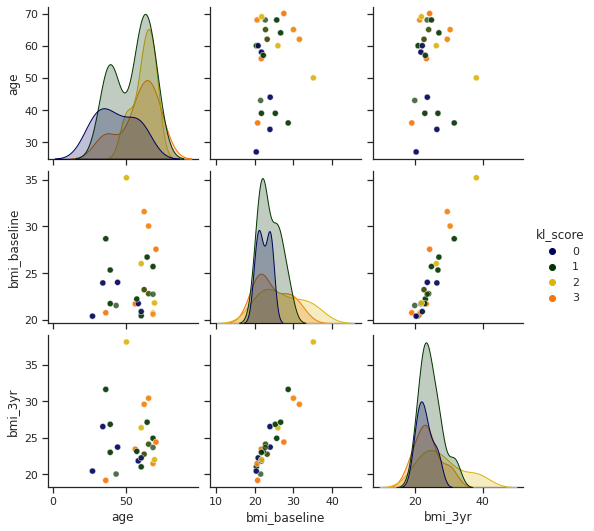

In [26]:
#DEMOGRAPHICS<> KL Score
# Use seaborn for pair plots
sns.set(style="ticks", color_codes=True);

# Will only use six variables for plotting pairs
reduced_features = df[['age', 'bmi_baseline', 'bmi_3yr', 'kl_score' ]]

palette = sns.xkcd_palette(['dark blue', 'dark green', 'gold', 'orange'])

# Make the pair plot with a some aesthetic changes
sns.pairplot(reduced_features,hue = 'kl_score', palette = palette, diag_kind = 'kde', plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True)); 

In [ ]:
#DEMOGRAPHICS <> SHOAMRI
# Will only use six variables for plotting pairs
reduced_features = df[['age', 'bmi_baseline', 'bmi_3yr', 'shoamri_car_score' ]]

# Make the pair plot with a some aesthetic changes
sns.pairplot(reduced_features,hue = 'shoamri_car_score', diag_kind = 'kde', plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True)); 


In [ ]:
#functional tests <> HOOS
# Use seaborn for pair plots
sns.set(style="ticks", color_codes=True);

# Will only use six variables for plotting pairs
reduced_features = df[['age', 'bmi_baseline', 'hoos_pain_score_baseline', 'hoos_pain_score_3yr',
 'char_rise_baseline',
 'm_walk_test_baseline',
 'stair_climbing_baseline',
 'side_plank_baseline',
 'char_rise_3yr',
 'm_walk_test_3yr',
 'stair_climbing_3yr',
 'side_plank_3yr',
'kl_score']]
                       

# Make the pair plot with a some aesthetic changes
sns.pairplot(reduced_features,hue = 'kl_score', palette = palette, diag_kind = 'kde', plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True)); 

In [ ]:
#cartilage scores <> HOOS
# Use seaborn for pair plots
sns.set(style="ticks", color_codes=True);

# Will only use six variables for plotting pairs
reduced_features = df[['age', 'bmi_baseline', 'hoos_pain_score_baseline', 'hoos_pain_score_3yr',
 't1rho_mean_fem_whole_cartilage_baseline',
 't2_mean_fem_whole_cartilage_baseline',
 't1rho_mean_ace_whole_cartilage_baseline',
 't2_mean_ace_whole_cartilage_baseline',
 't1rho_mean_fem_whole_cartilage_3yr',
 't2_mean_fem_whole_cartilage_3yr',
 't1rho_mean_ace_whole_cartilage_3yr',
 't2_mean_ace_whole_cartilage_3yr', 'kl_score']]
                       

# Make the pair plot with a some aesthetic changes
sns.pairplot(reduced_features,hue = 'kl_score', palette = palette, diag_kind = 'kde', plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True)); 

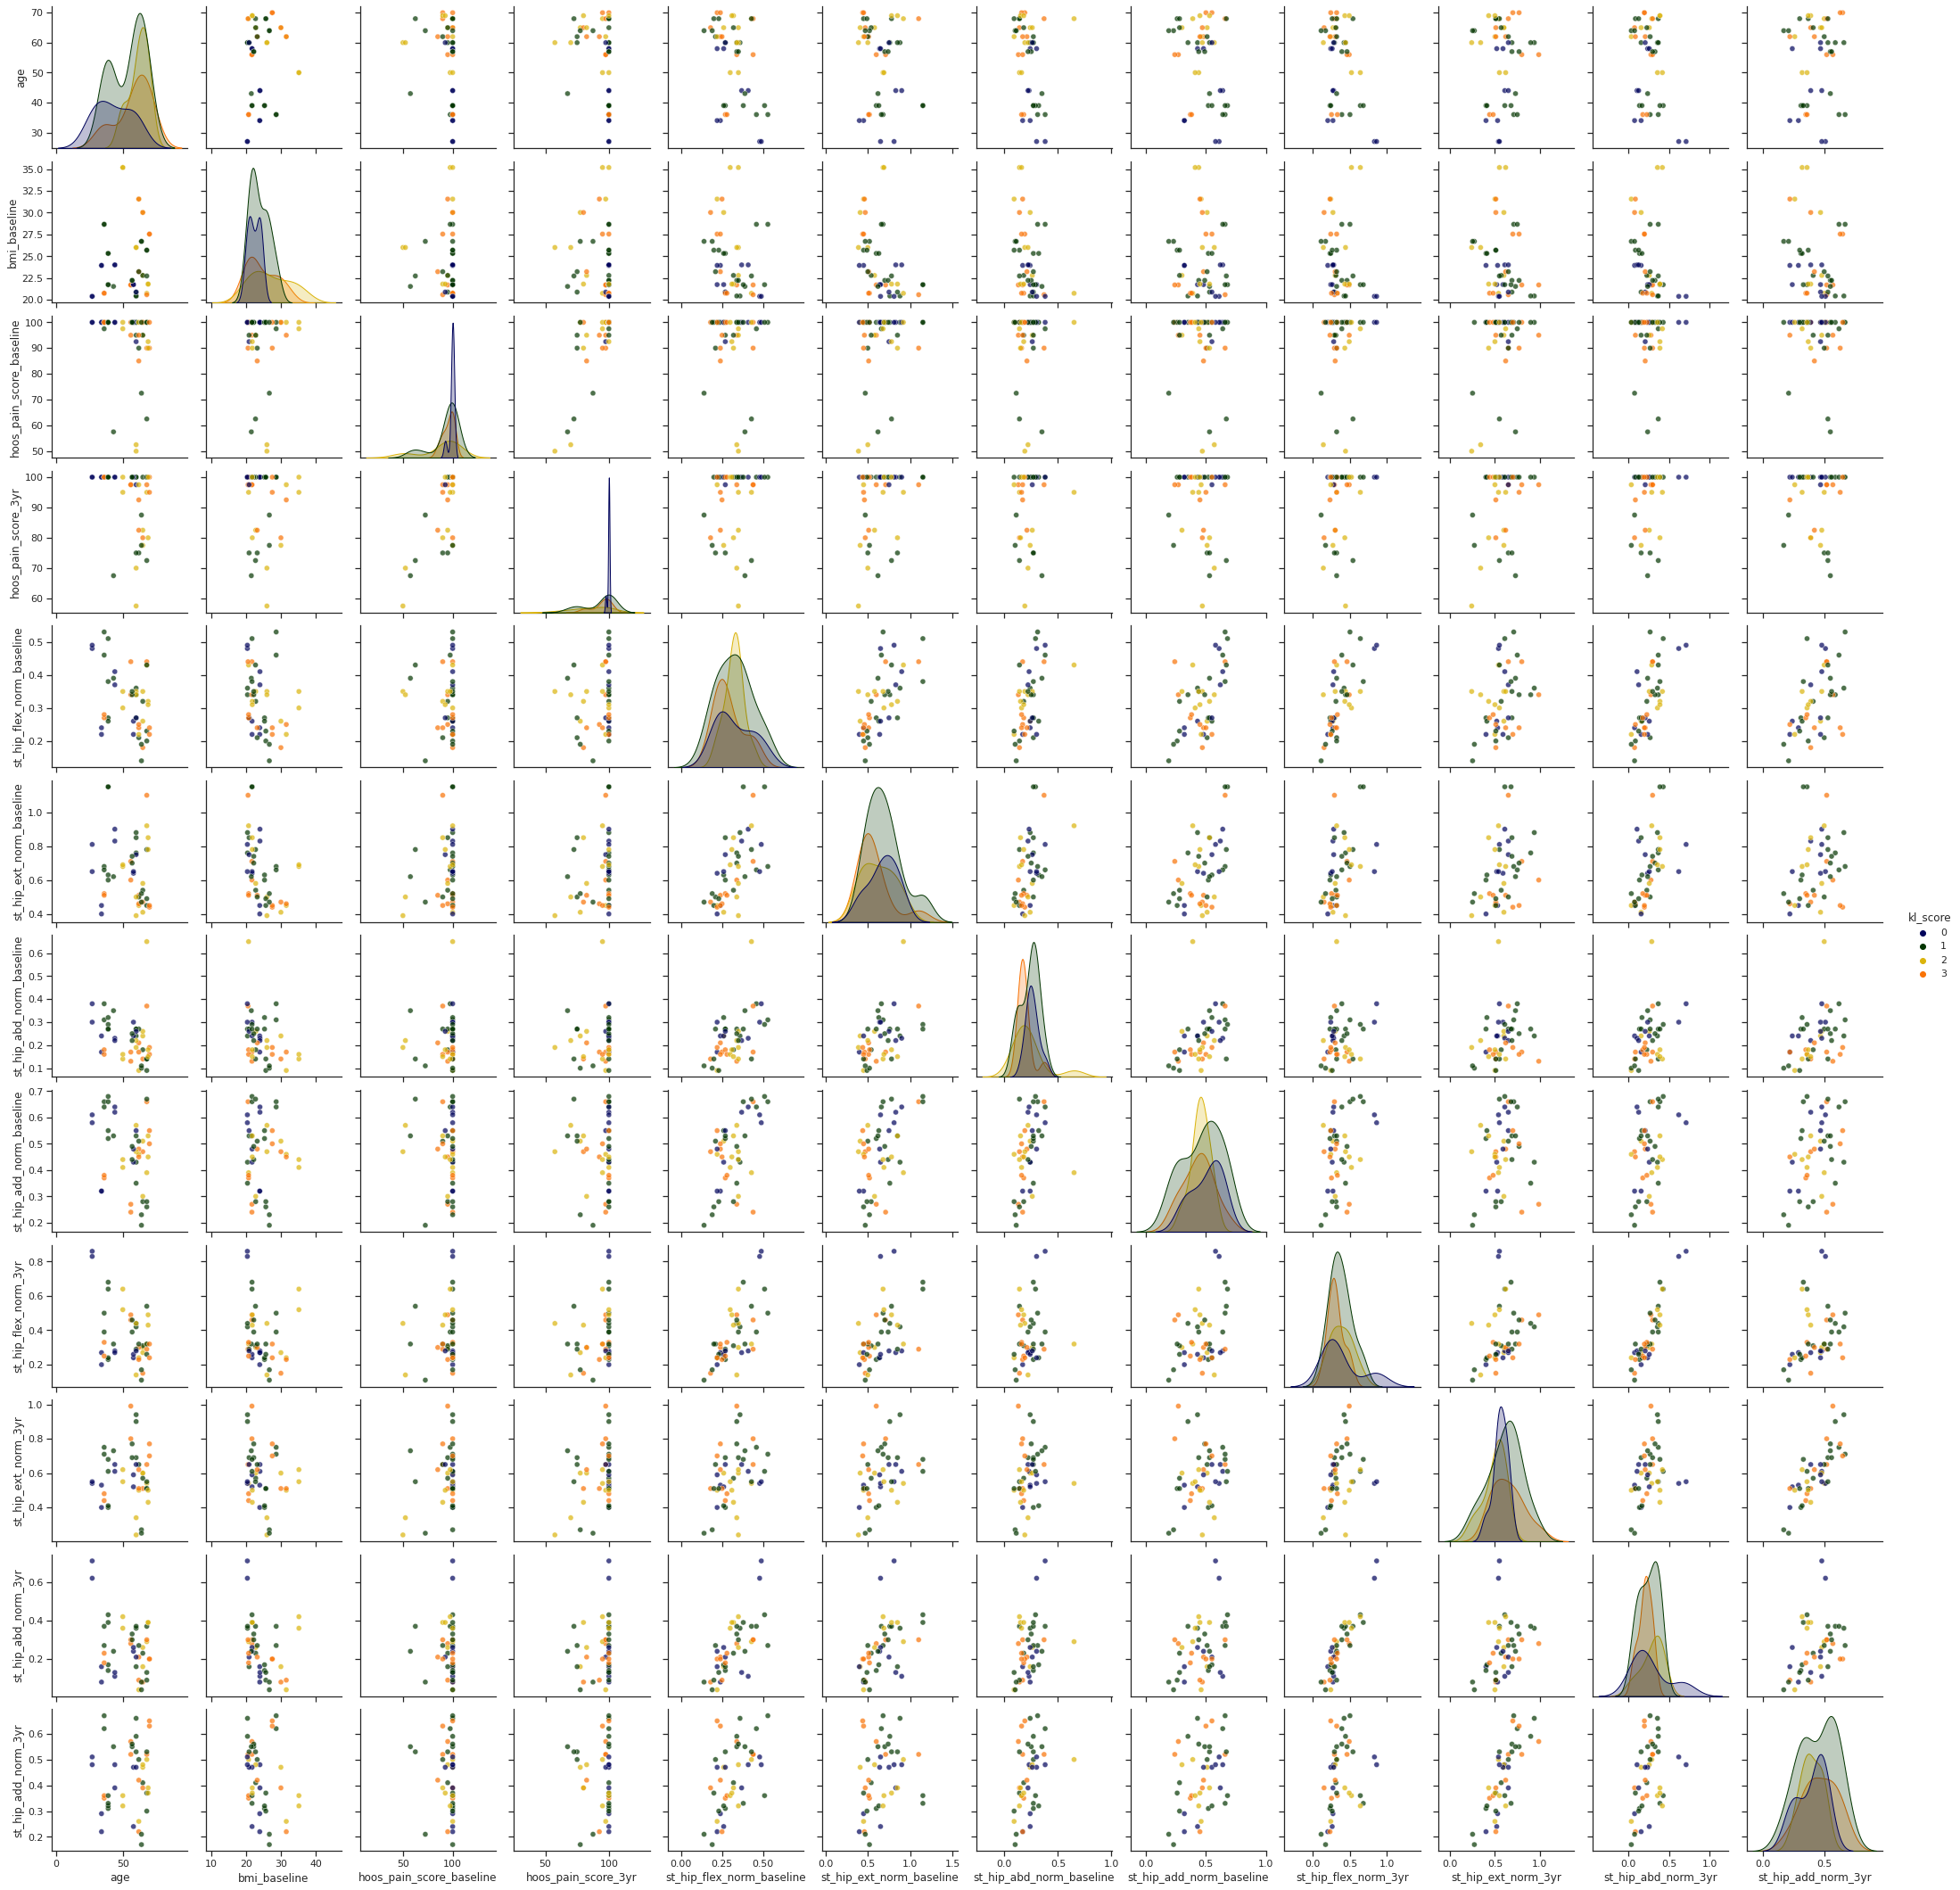

In [27]:
#cartilage scores <> HOOS
# Use seaborn for pair plots
sns.set(style="ticks", color_codes=True);

# Will only use six variables for plotting pairs
reduced_features = df[['age', 'bmi_baseline', 'hoos_pain_score_baseline', 'hoos_pain_score_3yr',
'st_hip_flex_norm_baseline',
 'st_hip_ext_norm_baseline',
 'st_hip_abd_norm_baseline',
 'st_hip_add_norm_baseline',
 'st_hip_flex_norm_3yr',
 'st_hip_ext_norm_3yr',
 'st_hip_abd_norm_3yr',
 'st_hip_add_norm_3yr',
'kl_score']]
                       

# Make the pair plot with a some aesthetic changes
sns.pairplot(reduced_features,hue = 'kl_score', palette = palette, diag_kind = 'kde', plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True)); 

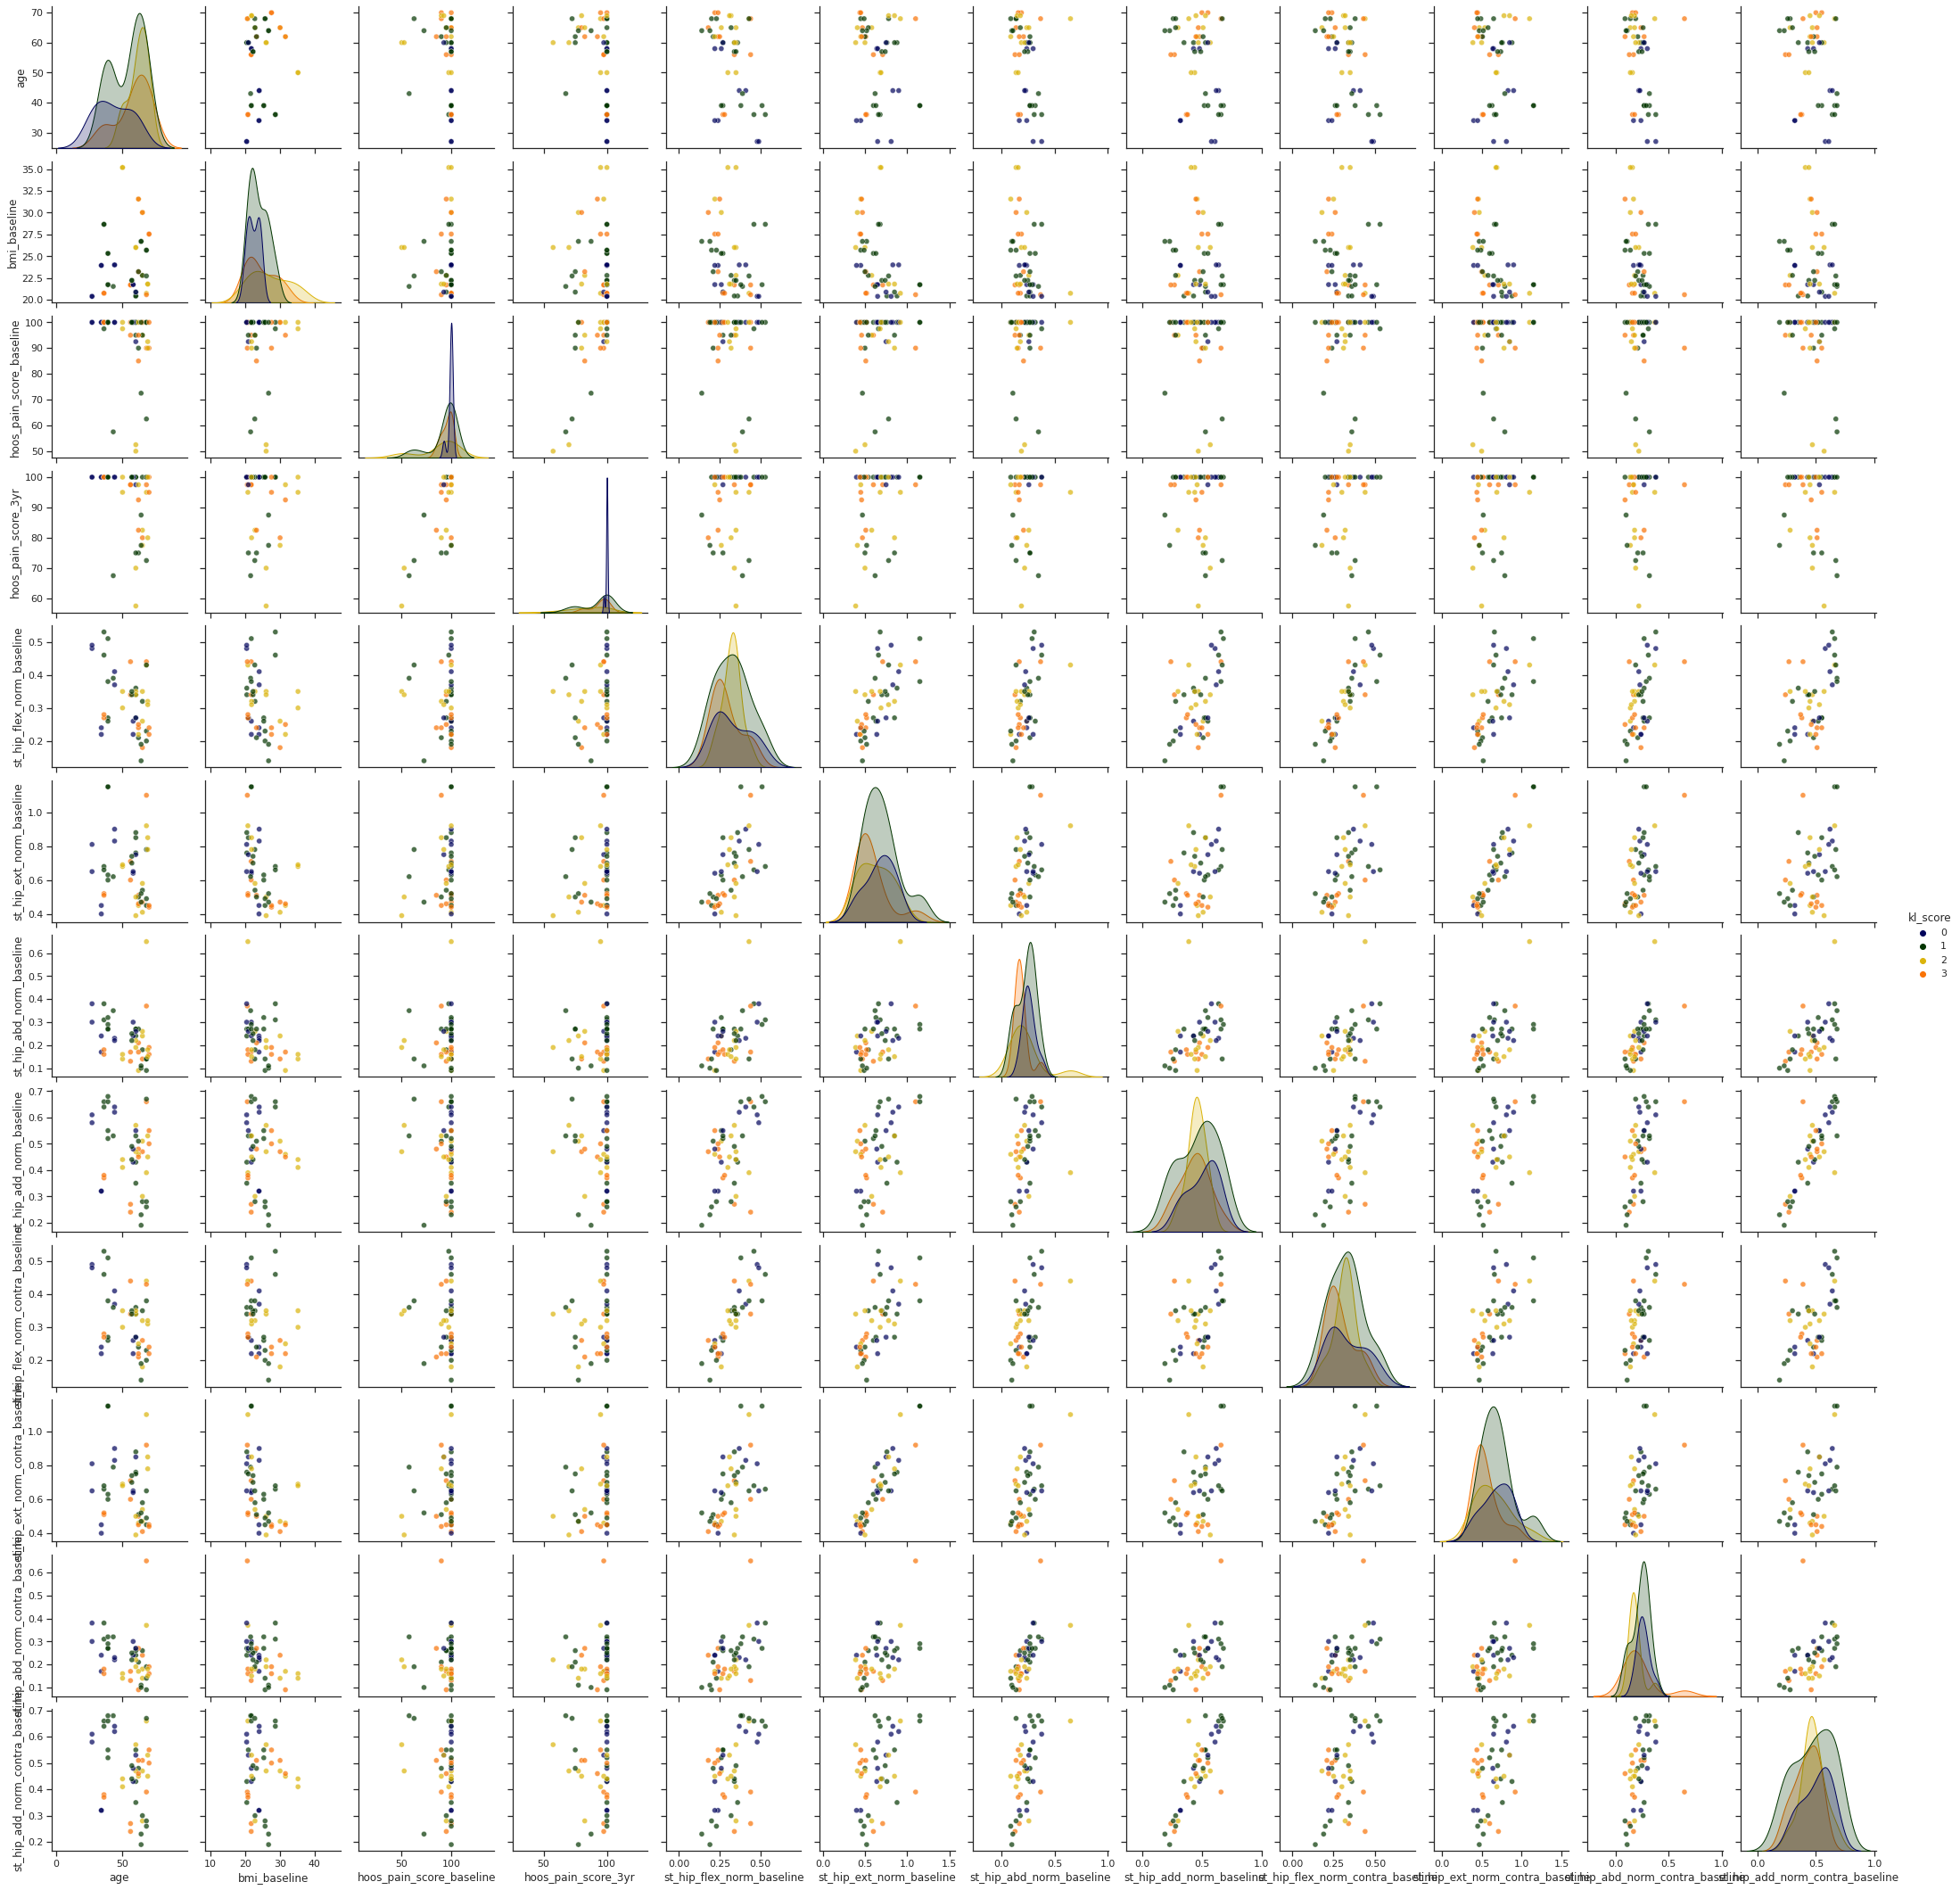

In [28]:
#cartilage scores <> HOOS
# Use seaborn for pair plots
sns.set(style="ticks", color_codes=True);

# Will only use six variables for plotting pairs
reduced_features = df[['age', 'bmi_baseline', 'hoos_pain_score_baseline', 'hoos_pain_score_3yr',
'st_hip_flex_norm_baseline',
 'st_hip_ext_norm_baseline',
 'st_hip_abd_norm_baseline',
 'st_hip_add_norm_baseline',
 'st_hip_flex_norm_contra_baseline',
 'st_hip_ext_norm_contra_baseline',
 'st_hip_abd_norm_contra_baseline',
 'st_hip_add_norm_contra_baseline', 'kl_score']]
                       

# Make the pair plot with a some aesthetic changes
sns.pairplot(reduced_features,hue = 'kl_score', palette = palette, diag_kind = 'kde', plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True)); 

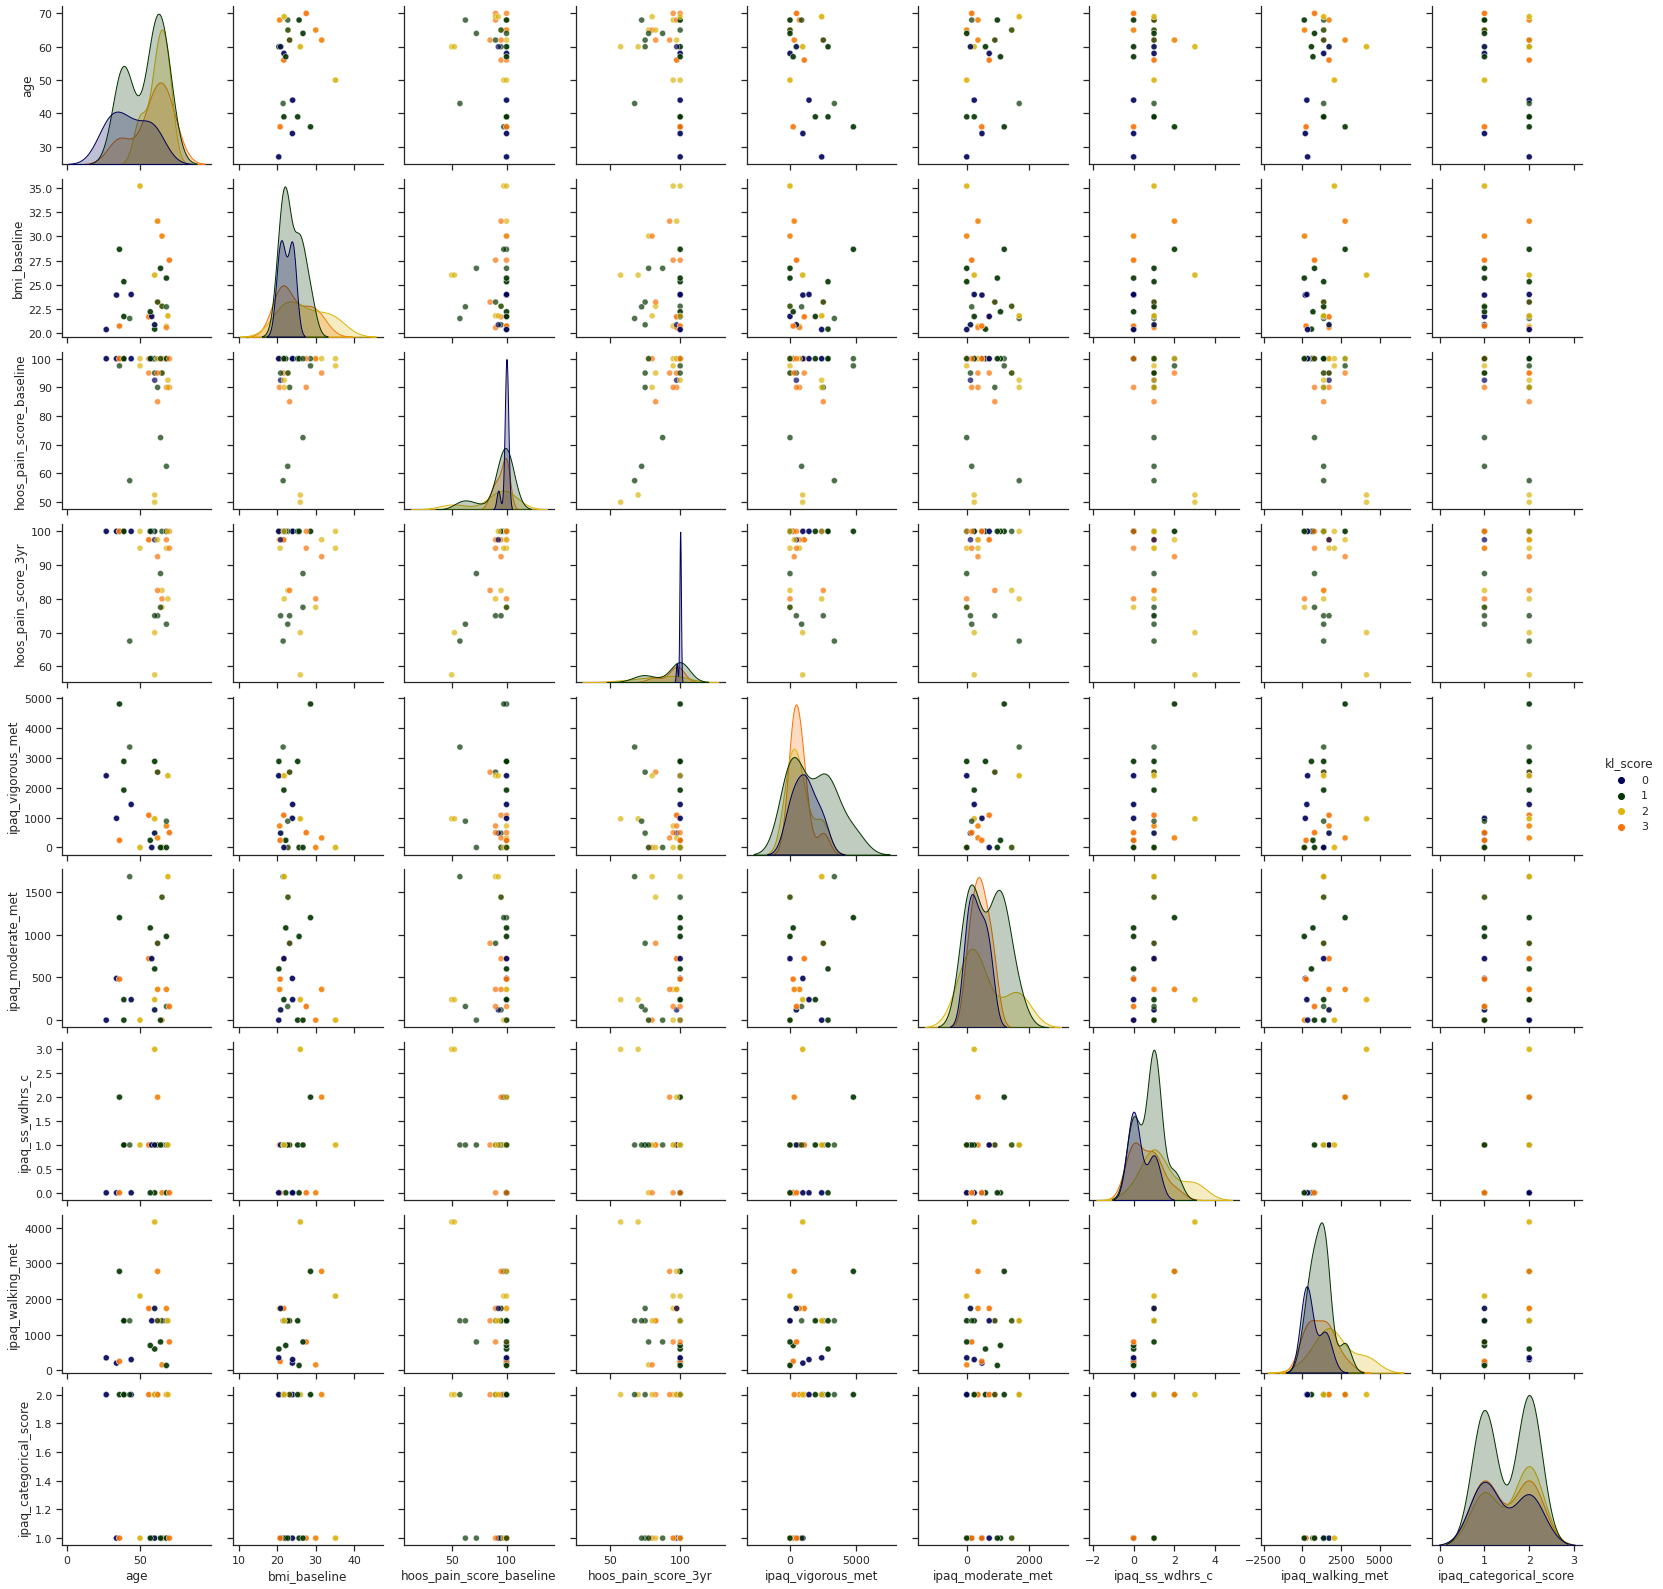

In [29]:
#cartilage scores <> HOOS
# Use seaborn for pair plots
sns.set(style="ticks", color_codes=True);

# Will only use six variables for plotting pairs
reduced_features = df[['age', 'bmi_baseline', 'hoos_pain_score_baseline', 'hoos_pain_score_3yr',
'ipaq_vigorous_met',
 'ipaq_moderate_met',
 'ipaq_ss_wdhrs_c',
 'ipaq_walking_met',
 'ipaq_categorical_score', 'kl_score']]
                       

# Make the pair plot with a some aesthetic changes
sns.pairplot(reduced_features,hue = 'kl_score', palette = palette, diag_kind = 'kde', plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True)); 

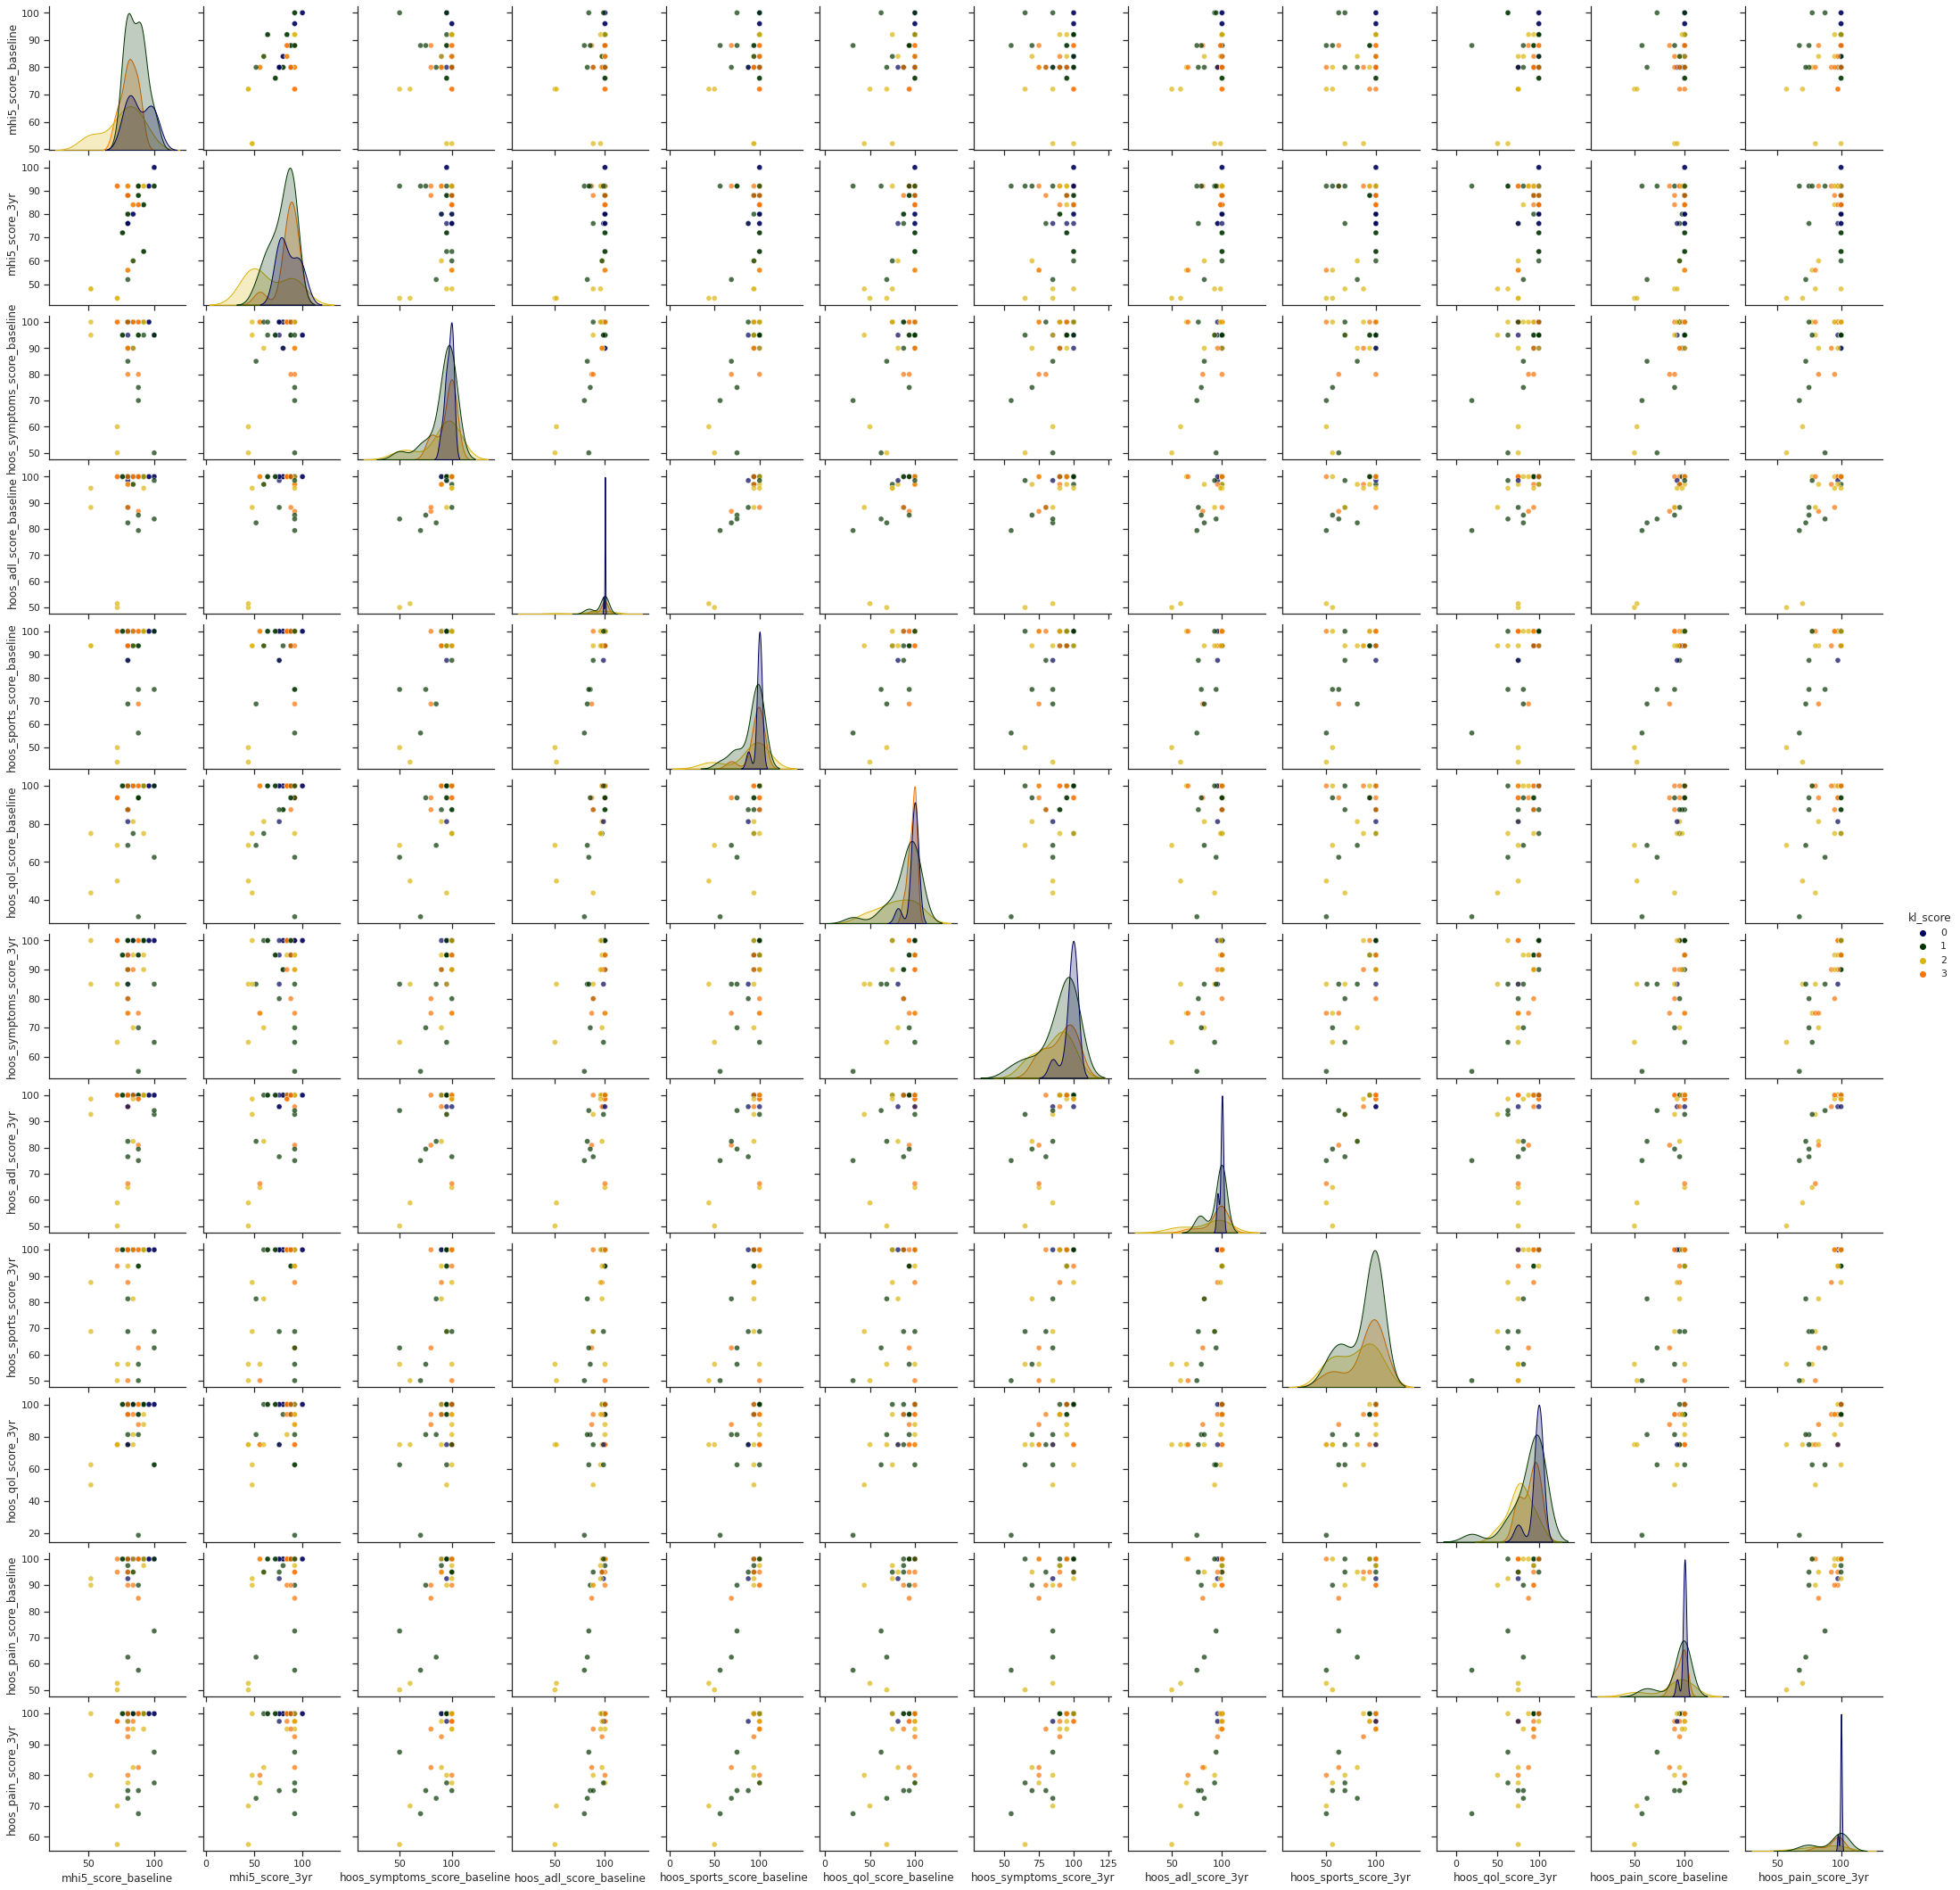

In [30]:
#cartilage scores <> HOOS
# Use seaborn for pair plots
sns.set(style="ticks", color_codes=True);

# Will only use six variables for plotting pairs
reduced_features = df[['mhi5_score_baseline',
 'mhi5_score_3yr',
 'hoos_symptoms_score_baseline',
 'hoos_adl_score_baseline',
 'hoos_sports_score_baseline',
 'hoos_qol_score_baseline',
 'hoos_symptoms_score_3yr',
 'hoos_adl_score_3yr',
 'hoos_sports_score_3yr',
 'hoos_qol_score_3yr',
 'hoos_pain_score_baseline',
 'hoos_pain_score_3yr', 'kl_score']]
                       

# Make the pair plot with a some aesthetic changes
sns.pairplot(reduced_features,hue = 'kl_score', palette = palette, diag_kind = 'kde', plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True)); 

In [ ]:
#single output
y = df['hoos_pain_score']

In [ ]:
#multioutput
y = df[['hoos_pain_score', 't1rho_mean_fem_whole_cartilage',
 't2_mean_fem_whole_cartilage', 't1rho_mean_ace_whole_cartilage',
 't2_mean_ace_whole_cartilage']]

In [ ]:
df.drop(['participant_id',], axis=1, inplace=True)


In [ ]:
list(df.columns)

In [ ]:
#run rf classifier base model on full dataset
clf = ExtraTreesRegressor(n_estimators=1000, max_depth=None,
    min_samples_split=2, random_state=0, max_features = "auto")
clf.fit(df, y)

In [ ]:
#examine feature importance
feature_df = pd.DataFrame({'feature': df.columns,
                          'importance': clf.feature_importances_})
feature_df.sort_values(by='importance', ascending=False)

In [ ]:
# Split up training and testing Sets
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(df, y, 
                                                                            test_size = 0.4, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

In [ ]:
print('Parameters currently in use:\n')
pprint(clf.get_params())

In [ ]:
#Create a random grid to search for best hyperparameters
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

In [ ]:
rf = ExtraTreesRegressor() 
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, n_jobs=-1,
                              return_train_score=True)


rf_random.fit(train_features, train_labels);

In [ ]:
rf_random.best_params_

In [ ]:
#evaluate accuracy of base model using .score 
base_model = ExtraTreesRegressor(n_estimators = 10, random_state = 42)
base_model.fit(train_features, train_labels)
base_model.score(test_features, test_labels) #r squared

In [ ]:
# Make predictions on test data using the model trained on original data
predictions = base_model.predict(test_features)
errors = abs(predictions - test_labels)
# Performance metrics

print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(errors), 2), 'points.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
#evaluate accuracy of model using evaluate function
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
base_accuracy = evaluate(base_model, test_features, test_labels)

In [ ]:
#evaluation accuracy of best model from random grid search
best_random = rf_random.best_estimator_
best_random.score(test_features, test_labels) #r squared

In [ ]:
# Make predictions on test data using the model trained on original data
predictions = best_random.predict(test_features)
errors = abs(predictions - test_labels)
# Performance metrics

print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(errors), 2), 'points.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
#evaluate accuracy of model using accuracy_score 
random_accuracy = evaluate(best_random, test_features, test_labels)

In [ ]:
#examine feature importances from best model from random grid search
feature_df = pd.DataFrame({'feature': df.columns,
                          'importance': best_random.feature_importances_})
feature_df.sort_values(by='importance', ascending=False)

In [ ]:
#https://scikit-learn.org/stable/modules/multiclass.html#multioutput-regression

In [ ]:
viz = dtreeviz(best_random.estimators_[0], train_labels, train_features)

